In [55]:
from importlib import reload
import starter
import numpy as np
from starter import *
import matplotlib.pyplot as plt 
reload(starter)
train_a = load_data('train_a.txt')
train_b = load_data('train_b.txt')
train_c = load_data('train_c.txt')
test_a = load_data('test_a.txt')
test_b = load_data('test_b.txt')
test_c = load_data('test_c.txt')
valid_a = load_data('valid_a.txt')
valid_b = load_data('valid_b.txt')
valid_c = load_data('valid_c.txt')
movieLens = load_data('movielens.txt')

In [29]:
reload(starter)
precision, recall, f1, ratings = evaluate(train_a, test_a, movieLens, k = 10,  mode = "mean", demographic= True, metric="pearson", threshold = 4)
print("Precision = ", precision, "Recall = ", recall, "F1 = ", f1)
print(ratings)

Precision =  0.75 Recall =  1.0 F1 =  0.8571428571428571
[('Return of the Jedi (1983)', 5, 5), ('Titanic (1997)', 5, 4), ('Scream (1996)', 4, 5), ("Ulee's Gold (1997)", 4, 1)]


In [79]:
reload(starter)
d_pearson_f1 = []
d_cosine_f1 = []
d_euclidean_f1 = []
for _ in range(3,100):
    precision, recall, f1, ratings = evaluate(train_a, test_a, movieLens, k = _,  mode = "mean", demographic= True, metric="pearson", threshold = 4)
    d_pearson_f1 += [f1]
    precision, recall, f1, ratings = evaluate(train_a, test_a, movieLens, k = _,  mode = "mean", demographic= True, metric="cosine", threshold = 4)
    d_cosine_f1 += [f1]
    precision, recall, f1, ratings = evaluate(train_a, test_a, movieLens, k = _,  mode = "mean", demographic= True, metric="eucldidean", threshold = 4)
    d_euclidean_f1 += [f1]

pearson_f1 = []
cosine_f1 = []
euclidean_f1 = []
for _ in range(3,100):
    precision, recall, f1, ratings = evaluate(train_a, test_a, movieLens, k = _,  mode = "mean", demographic= False, metric="pearson", threshold = 4)
    pearson_f1 += [f1]
    precision, recall, f1, ratings = evaluate(train_a, test_a, movieLens, k = _,  mode = "mean", demographic= False, metric="cosine", threshold = 4)
    cosine_f1 += [f1]
    precision, recall, f1, ratings = evaluate(train_a, test_a, movieLens, k = _,  mode = "mean", demographic= False, metric="eucldidean", threshold = 4)
    euclidean_f1 += [f1]



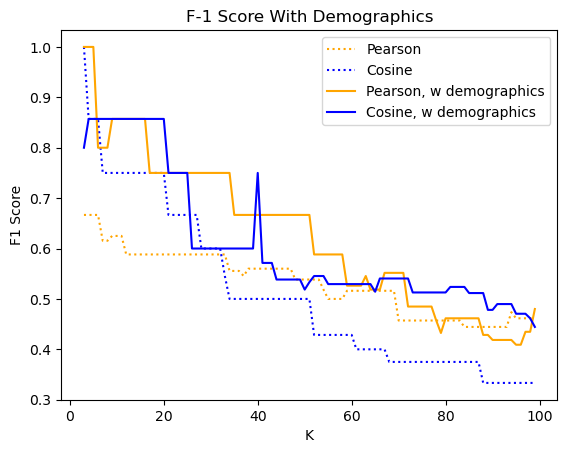

In [80]:
plt.figure()
plt.title("F-1 Score With Demographics")
plt.ylabel("F1 Score")
plt.xlabel("K")

plt.plot([_ for _ in range(3,100)], pearson_f1, color = "orange", linestyle = ":", label = "Pearson")
plt.plot([_ for _ in range(3,100)], cosine_f1, color = "blue", linestyle = ":", label = "Cosine")

plt.plot([_ for _ in range(3,100)], d_pearson_f1, color = "orange", label = "Pearson, w demographics")
plt.plot([_ for _ in range(3,100)], d_cosine_f1, color = "blue", label = "Cosine, w demographics")
plt.legend()
plt.show()